In [1]:
!pip install pysuffixarray
!pip install Biopython
import Bio
from Bio import SeqIO
from pysuffixarray.core import SuffixArray

  Preparing metadata (setup.py) ... done
  Created wheel for pysuffixarray: filename=pysuffixarray-0.0.1-py3-none-any.whl size=3484 sha256=c9f61e98c19565d887b7b65c9025e6f149cbab02f72ee9d5e69c28a88a5f1ad3
  Stored in directory: /root/.cache/pip/wheels/41/f8/85/65fa214f5e3c49c8585c33c1ecde6368e3460d129ebb353ae8
Successfully built pysuffixarray
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 26.9 MB/s eta 0:00:00


In [2]:
from Bio import SeqUtils
from Bio.SeqUtils import gc_fraction
import random
import numpy as np
import math
import matplotlib.pyplot as plt

#Задача №0 (3)
Дорешайте задачу про риды и BWT из файла practice4.ipynb. В ответе помимо кода укажите количество ридов первой, второй и третьей категории, а также вкратце опишите ход решения.

In [ ]:
class BWTSearcher():
    def __init__(self, reference):
        # Construct the suffix array
        self.sa = SuffixArray(reference)

        # Construct the BWT from the suffix array
        self.bwt_text = ''.join(reference[i-1] if i != 0 else '$' for i in self.sa.suffix_array())

        self.Occ = {ch: [0] * len(self.bwt_text) for ch in "$ACGT"}

        for i, ch in enumerate(self.bwt_text):
            for ch2 in "ACGT":
                if i != 0:
                    self.Occ[ch2][i] = self.Occ[ch2][i - 1]
            if ch in self.Occ.keys():
                self.Occ[ch][i] += 1

        self.count = {}
        total = 0
        for ch in "$ACGT":
            self.count[ch] = total
            total += self.bwt_text.count(ch)


    def bwt_pattern_search(self, pattern):
        top = 0
        bottom = len(self.bwt_text) - 1
        for char in reversed(pattern):
            if char in self.Occ:
                top = self.count[char] + (0 if top == 0 else self.Occ[char][top  - 1])
                bottom = self.count[char] + self.Occ[char][bottom] - 1
            else:
                return []

            if top > bottom:
                return []

        return self.sa.suffix_array()[top:bottom + 1]

    def check_no_mutation(self, pattern):
        ind = self.bwt_pattern_search(pattern)
        if len(ind) != 0:
            return True, ind
        else:
            return False, None

    def check(self, pattern):
        for i in range(len(pattern)):
          if i == 0:
            res, ind = self.check_no_mutation( pattern[1:])
            if res:
              return True
          if i == len(pattern)-1:
            res, ind =  self.check_no_mutation( pattern[:-1])
            if res:
              return True
          res_left, ind_left = self.check_no_mutation( pattern[:i])
          res_right, ind_right = self.check_no_mutation( pattern[i+1:])
          if res_left and res_right:
            sett = set(ind_right)
            for j in ind_left:
                if i+j+1 in sett:
                  return True
        return False


In [ ]:
fasta_file = "genome.fa"
text = SeqIO.read(fasta_file, "fasta")
bwt = BWTSearcher(text.seq)

In [ ]:
# Process each read through the BWTSearcher
with open("sample_reads.fasta", "r") as file:
    count_zero = 0
    count_one = 0
    count_else = 0
    for record in SeqIO.parse(file, "fasta"):
        read_sequence = str(record.seq)
        res, ind = bwt.check_no_mutation(read_sequence)
        if res:
            count_zero += 1
        elif bwt.check(read_sequence):
            count_one += 1
        else:
            count_else += 1
print('error free: ', count_zero)
print('one mutation: ', count_one)
print('5 mutations: ', count_else)

error free:  45
one mutation:  31
5 mutations:  24


Краткое описание алгоритма:

Для каждого рида проверить
1.   Есть ли паттерн в тексте по стандартному алгоритму, значит нему мутаций
2.   Если первый пункт не выполнен, рассмотреть как отдельные паттерны все возможные пары срезов без одной буквы. Проверить есть ли во множестве вхождений правых срезов какое-то вхождение левого среза + его длинна. Значит 1 мутация
3.   В противном случае 5



Это домашнее задание можно выполнять целиком в этом ноутбуке, либо алгоритмы написать в отдельном файле и импортировать сюда, для использования. В папке data лежат два файла islands.fasta и nonIslands.fasta. В них хранятся прочтения из CpG островков и из обычных участков генома соответственно, этими данными нужно будет воспользоваться в первом задании.

#Задача №1 (1)
Определите частоты генерации для каждого из нуклеотидов внутри CpG островков и вне их. Посчитайте так-же частоты для всех упорядоченных пар нуклеотидов и сравните частоту пары CG внутри островков и снаружи. Сделайте вывод.

In [4]:
fasta_file = "nonIslands.fasta"
sequence_record = SeqIO.read(fasta_file, "fasta")
sequence = sequence_record.seq
print("nonIslands")
gc_content = gc_fraction(sequence)*100
at_content = 100 - gc_content
aa_content = sequence.count("A") / len(sequence) * 100
cc_content = sequence.count("C") / len(sequence) * 100
gg_content = sequence.count("G") / len(sequence) * 100
tt_content = sequence.count("T") / len(sequence) * 100

print("GC-контент:", gc_content)
print("AT-контент:", at_content)
print("A-контент:", aa_content)
print("C-контент:", cc_content)
print("G-контент:", gg_content)
print("T-контент:", tt_content)
pairs = {'AA':0, 'AT':0, 'AC':0, 'AG':0,
                   'TA':0, 'TT':0, 'TC':0, 'TG':0,
                   'CA':0, 'CT':0, 'CC':0, 'CG':0,
                   'GA':0, 'GT':0, 'GC':0, 'GG':0}
for i in range(len(sequence)-1):
        pairs[sequence[i]+sequence[i+1]] += 1
for i, f in pairs.items():
    print(f'{i}-контент: {f/len(sequence) * 100}')

nonIslands
GC-контент: 39.45845672879991
AT-контент: 60.54154327120009
A-контент: 28.929861153616176
C-контент: 19.613640750872204
G-контент: 19.84481597792771
T-контент: 31.61168211758391
AA-контент: 8.987584336583597
AT-контент: 8.209780924983404
AC-контент: 4.712961349950328
AG-контент: 7.0190637167891605
TA-контент: 7.100516495364725
TT-контент: 10.748941820116482
TC-контент: 6.47573130941227
TG-контент: 7.286492492690437
CA-контент: 6.818492134863202
CT-контент: 7.265776179064281
CC-контент: 5.001577264787446
CG-контент: 0.5277951721572745
GA-контент: 6.02326818680465
GT-контент: 5.387183193419745
GC-контент: 3.4229000014124757
GG-контент: 5.011464596290838


In [5]:
fasta_file = "islands.fasta"
with open(fasta_file, "r") as file:
    L = 0
    pairs = {'AA':0, 'AT':0, 'AC':0, 'AG':0,
                   'TA':0, 'TT':0, 'TC':0, 'TG':0,
                   'CA':0, 'CT':0, 'CC':0, 'CG':0,
                   'GA':0, 'GT':0, 'GC':0, 'GG':0}
    ones = {'A': 0, 'T':0, 'C':0, 'G':0}
    for record in SeqIO.parse(file, "fasta"):
        seq = record.seq
        L += len(seq)
        for i in range(len(seq)-1):
            pairs[seq[i]+seq[i+1]] += 1
            ones[seq[i]] += 1
        ones[seq[-1]] += 1

print("Islands")
print("GC-контент:", (ones['G']+ones['C'])/L*100)
print("AT-контент:", (ones['A']+ones['T'])/L*100)
for i, f in ones.items():
    print(f'{i}-контент: {f/L * 100}')
for i, f in pairs.items():
    print(f'{i}-контент: {f/L * 100}')

Islands
GC-контент: 59.46734135667396
AT-контент: 40.532658643326045
A-контент: 20.246225382932167
T-контент: 20.286433260393874
C-контент: 29.639660831509847
G-контент: 29.827680525164112
AA-контент: 5.118626914660831
AT-контент: 3.3400984682713344
AC-контент: 4.586980306345733
AG-контент: 7.188840262582056
TA-контент: 2.8439551422319473
TT-контент: 5.100109409190372
TC-контент: 5.949972647702407
TG-контент: 6.380005470459518
CA-контент: 6.286187089715536
CT-контент: 7.171307439824945
CC-контент: 10.27417943107221
CG-контент: 5.895432166301969
GA-контент: 5.984463894967177
GT-контент: 4.663539387308534
GC-контент: 8.815618161925602
GG-контент: 10.350683807439825


Внутри CpG островков GC-контент больше на 20%. Соотношение A:T и G:C примерно 1:1 для обоих случаев. Среди динуклеотидов в островках преобладают GG, CC > GC > AG, CT. А вне островков TT > AA, AT > CT, TG, TA, AG.

#Задача №2 (2)
Напишите марковскую модель, которая имеет открытые состояния {A, T, G, C}, и скрытые состояния {+, -}. Когда модель в состоянии +, то вероятность генерации некоторого символа нуклеотида соответствует его частоте внутри CpG островков, вычислиному в первом задании, если состояние -, то частоте вне островков. Вероятность остаться внутри островка 0.95, а перейти в обычный геном 0.05. Для остальной части генома соответствующие вероятности 0.995 и 0.005. Саму модель можно реализовать в виде итератора, определив метод next, который возвращает пару - состояние и нуклеотид, который в этом состоянии произведен.
Воспользуйтесь данной моделью для того чтобы сгенерировать набор из 20 последовательностей длинной от 1 000 до 100 000, причем к каждой последовательности должна прилагаться последовательность состояний.

In [6]:
cpg_island = {key: val/L for key, val in ones.items()}
non_cpg_island = {
    "A": aa_content/100,
    "T": tt_content/100,
    "G": gg_content/100,
    "C": cc_content/100,
}

# Вероятности переходов между состояниями
transition_probabilities = {'+':{"+": 0.95, "-": 0.05}, '-': {"+": 0.005, '-': 0.995}}


In [7]:
class HMM_generator:
    def __init__(self, length):
        self.length = length
        self.state = '-'
        self.n = 1

    def __next__(self):
        if self.n <= self.length:
            if self.state == "+":
              nucl = random.choices(list(cpg_island.keys()), weights=list(cpg_island.values()))[0]
            else:
              nucl = random.choices(list(non_cpg_island.keys()), weights=list(non_cpg_island.values()))[0]
            self.n += 1
            state = self.state
            self.state = random.choices(list(transition_probabilities.keys()), weights=list(transition_probabilities[self.state].values()))[0]
            return nucl, state
        else:
            raise StopIteration

    def __iter__(self):
        return self

In [8]:
sequences = []
for _ in range(20):
    length = random.randint(1000, 100000)
    sequence, state_sequence = '', ''
    for n, s in HMM_generator(length):
      sequence += n
      state_sequence += s

    sequences.append((sequence, state_sequence))
print(sequence)
print(state_sequence)

CGTTAAAATATCTCATTCTCATTCATAGAACTGACACAAAGGCTGGGTGATTGATATTTGGTGTCGTCTCACCCACTGAAACCGTCTAACCTTAGCAAACAGGTCTCCCCCTTGATTTGTCCGCGCTCTGGAATACTGATGTCGTCTGTATAACATTATGGTTCAATCTTGACAGTCCGTCGCGTGTTGTAGGGATAATTGTATGGGCACGCACGAGGAGTGTGCCAGCGAGCTATCGATCATTTAGCTTGACTCAACAATCAAGACATGGTAGTTTATCTACCGAACGGCTACTTTAAATAGGACTATGGGTAGGCGATTCTATACAAATCAATATATAGTCATCACGTCCTCGGATATATAGGTTCTGTAGCTACAGATGCAGGGAGGGCTCGCCTGAGTACAGGTTTATTGTGCGGTTATACCTTTGCCCGTTCACTGCTCAAGTGCCTCGAACCTGCCATATGTATGTTTCAAAATTTACATCAGTACATCTTAACTACACTCACTCTACCATATTCTGCATCAAGGGATTAGTACACCATATTGGTGAAGTGCTCGCCCAGGGGCTCTGTCCACCCGTATGGATGGGCATGTTTTGGATACTTTGATCGTCCGAACGTCTTTGCGAGTCCCCATGCTATGAGCAAACATTTGTGGCGGGGGAGATACATTGACGGACACGACTCATGCCGTCAACGGACGGCCGAACTTATTGTGGGAAGAAGGAGGCCTCCAATAGGAATGATGAGTTTTCCTAGTAGTACCTTTGCAAGCAACTGAATTTTGTTTGCTTTATTACTCATGATTACCGTAACGAAACAATACTATCGCAGGTAGGCGTATATTTAATGTAAACAATTGTGACTCGTTGTTACGCTCTGTATATAATAATGTCCATTTCGAACAATTCTAGATGTTTTGCGAGTAAGCTTCTGAGACTCTTTGGTACGTGTAGTTTCTTCCCGTATCCAAATCGATCATTTTGTTCTCTTTCTTG

#Задача №3 (4)
Напишите алгоритм Витерби для восстановления последовательности скрытых состояний марковской модели из второго задаания. Воспользуйтесь им, воссстановив состояния тех последовательностей, которые вы получили во втором задании и посчитайте TP, TN, FP, FN по количеству правильно или ошибочно предсказанных позиций из CpG остравков.

In [9]:
emission_probabilities = [non_cpg_island, cpg_island]
tp = [[0.995, 0.005], [0.05, 0.95]]
#1 = +
#0 = -
print(emission_probabilities)

[{'A': 0.28929861153616176, 'T': 0.3161168211758391, 'G': 0.1984481597792771, 'C': 0.19613640750872205}, {'A': 0.20246225382932168, 'T': 0.20286433260393874, 'C': 0.29639660831509845, 'G': 0.29827680525164113}]


In [10]:
def viterbi(observations, states=[0, 1],
            transition_probabilities=tp,
            emission_probabilities=emission_probabilities,
            initial_probabilities=[0, 1]):
    """Алгоритм Витерби.
    Args:
        observations: последовательность наблюдений.
        states: список возможных скрытых состояний.
        transition_probabilities: матрица вероятностей переходов между состояниями.
        emission_probabilities: матрица вероятностей генерации наблюдений в каждом состоянии.
        initial_probabilities: вектор вероятностей начальных состояний.
    """

    T = len(observations)  # Количество наблюдений
    N = len(states)  # Количество состояний

    # dp = np.zeros((T, N))
    dp = np.full((T, N), -np.inf)
    backptr = np.zeros((T, N), dtype=int)

    for i in range(N):
        dp[0][i] = np.log(initial_probabilities[i]) + np.log(emission_probabilities[i][observations[0]])
    # Рекурсия
    for t in range(1, T):
        for i in range(N):
            j = 0
            prob0 = dp[t-1][j] + np.log(transition_probabilities[j][i]) + np.log(emission_probabilities[i][observations[t]])
            j = 1
            prob1 = dp[t-1][j] + np.log(transition_probabilities[j][i]) + np.log(emission_probabilities[i][observations[t]])
            if prob1 > prob0:
                dp[t][i] = prob1
                backptr[t][i] = 1
            else:
                dp[t][i] = prob0
                backptr[t][i] = 0
    # Обратное отслеживание
    path = []
    state = np.argmax(dp[T-1])
    path.append(state)
    for t in range(T-1, 0, -1):
        state = backptr[t][state]
        path.append(state)

    return path[::-1]

In [13]:
def calculate_metrics(true_sequence, predicted_sequence):
    TP, TN, FP, FN = 0, 0, 0, 0
    l = len(true_sequence)
    for i in range(len(true_sequence)):
        if true_sequence[i] == "+" and predicted_sequence[i] == 1:
            TP += 1
        elif true_sequence[i] == "-" and predicted_sequence[i] == 0:
            TN += 1
        elif true_sequence[i] == "-" and predicted_sequence[i] == 1:
            FP += 1
        else:
            FN += 1

    return f'TP={TP}, TN={TN/l*100 :.3f} %, FP={FP}, FN={FN/l*100 :.3f} % '

In [14]:
for seq, state in sequences:
  new_state = viterbi(seq)
  print(calculate_metrics(state, new_state))

<ipython-input-10-2a5bd5f24042>:22: RuntimeWarning: divide by zero encountered in log
  dp[0][i] = np.log(initial_probabilities[i]) + np.log(emission_probabilities[i][observations[0]])


TP=367, TN=90.307 %, FP=24, FN=9.109 % 
TP=293, TN=91.482 %, FP=58, FN=8.117 % 
TP=86, TN=90.692 %, FP=21, FN=9.075 % 
TP=428, TN=90.239 %, FP=143, FN=9.127 % 
TP=90, TN=92.126 %, FP=64, FN=5.869 % 
TP=377, TN=90.209 %, FP=102, FN=8.646 % 
TP=555, TN=90.669 %, FP=44, FN=8.608 % 
TP=0, TN=90.637 %, FP=1, FN=9.361 % 
TP=0, TN=92.022 %, FP=1, FN=7.965 % 
TP=173, TN=91.167 %, FP=53, FN=8.596 % 
TP=69, TN=92.621 %, FP=5, FN=7.265 % 
TP=142, TN=90.533 %, FP=8, FN=9.135 % 
TP=176, TN=90.703 %, FP=87, FN=8.670 % 
TP=277, TN=91.369 %, FP=90, FN=8.023 % 
TP=0, TN=93.012 %, FP=2, FN=6.977 % 
TP=336, TN=90.815 %, FP=71, FN=8.640 % 
TP=203, TN=91.942 %, FP=53, FN=7.677 % 
TP=38, TN=91.777 %, FP=82, FN=8.012 % 
TP=524, TN=90.873 %, FP=69, FN=8.396 % 
TP=113, TN=88.951 %, FP=2, FN=10.037 % 


#Задача №4 (4)
Напишите алгоритм вперед назад для модели из второго задания. Пользуясь этим алгоритмом найдите вероятности того, что модель находилась в состоянии + для каждой позиции строк из второго задания. Устанавливая различные пороговые значения, определите позиции соответствующие CpG островкам и посчитайте TP. Постройте график зависимости TP от выбранного порогового значения. Есть ли пороговые значения при которых TP больше чем в задании №3?

In [16]:
def forward_backward(observations, states, transition_probabilities, emission_probabilities, initial_probabilities):
    """Алгоритм вперед-назад.
    Returns:
        Матрица вероятностей нахождения в каждом состоянии в каждый момент времени.
    """

    T = len(observations)  # Количество наблюдений
    N = len(states)  # Количество состояний

    # вперед - a
    alpha = np.zeros((T, N))
    beta = np.zeros((T, N))

    for i in range(N):
        alpha[0][i] = np.log(initial_probabilities[i]*(emission_probabilities[i][observations[0]]))
    for t in range(1, T):
        for i in range(N):
            for j in range(N):
                # alpha[t][i] += alpha[t-1][j] * transition_probabilities[j][i] * emission_probabilities[i][observations[t]]
                alpha[t][i] += np.exp(alpha[t-1][j])*transition_probabilities[j][i]
            alpha[t][i] = np.log(alpha[t][i]) + np.log(emission_probabilities[i][observations[t]])
    # Вычисление вероятностей назад
    beta[T-1] = np.ones(N)
    for t in range(T-2, -1, -1):
        for i in range(N):
            for j in range(N):
                beta[t][i] += transition_probabilities[i][j] * emission_probabilities[j][observations[t+1]] * np.exp(beta[t+1][j])
            beta[t][i] = np.log(beta[t][i])
    # P  = np.log(np.sum(np.exp(alpha[:1]), emission_probabilities[i][observations[t]]))
    gamma = alpha + beta
    # gamma /= np.sum(gamma, axis=1)[:, np.newaxis]

    return gamma

In [17]:
def find_cpg_islands(gamma, threshold):
    cpg_islands = []
    in_island = False
    for t in range(gamma.shape[0]):
        if gamma[t][0] > threshold:
            if not in_island:
                cpg_islands.append(t)
            in_island = True
        else:
            in_island = False

    return cpg_islands

In [18]:
def plot_tp_vs_threshold(gamma, observations):
    thresholds = np.linspace(0, 0.5, 100)
    tps = []

    for threshold in thresholds:
        cpg_islands = find_cpg_islands(gamma, threshold)
        tp = 0
        for cpg_island in cpg_islands:
            if observations[cpg_island] == 1:
                tp += 1

        tps.append(tp)

    plt.plot(thresholds, tps)
    plt.xlabel("Threshold")
    plt.ylabel("TP")
    plt.show()

In [19]:
gamma = forward_backward(sequences[0][0], [0, 1], tp, emission_probabilities, [0, 1])

cpg_islands = find_cpg_islands(gamma, 0.5)
print(cpg_islands)

<ipython-input-16-fbfd0f121889>:15: RuntimeWarning: divide by zero encountered in log
  alpha[0][i] = np.log(initial_probabilities[i]*(emission_probabilities[i][observations[0]]))
<ipython-input-16-fbfd0f121889>:21: RuntimeWarning: divide by zero encountered in log
  alpha[t][i] = np.log(alpha[t][i]) + np.log(emission_probabilities[i][observations[t]])
<ipython-input-16-fbfd0f121889>:28: RuntimeWarning: divide by zero encountered in log
  beta[t][i] = np.log(beta[t][i])


[]


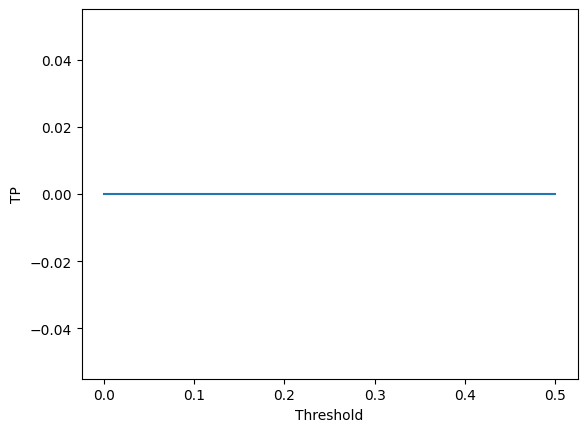

In [20]:
plot_tp_vs_threshold(gamma, sequences[0][0])